In [1]:
'''
This code propose a no delay highpass and lowpass filter that could be applied to arrays and time series (audio files, sensors reading, and etc), the regular Butterworth filter introduce a delay in time domain that is not preferred in many fields.
For more information check the scipy.signal package
if you have any question feel free to contact "fathian@ualberta.ca"
references: 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html
'''
class nodelaybutterworth:
    def __init__(self):
        """ 
        initiate the code to make sure that the needed libraries are included
        """
        from scipy import signal


    def butterworth(self, signal_input, cut_of_freq, sampling_frequency, filter_type, filter_order):
        """
        inputs:
            signal_input = array, the signal you want to filter it should be 1*n and the length should be at least 3* filter_order
            cut_of_frequency = int, the cut of frequency wether it is a low pass or high pass fitler in Hz
            sampling_frequency = int, the singla_input sampling frequency in Hz
            filter_type = str, it should be either "highpass" or "lowpass"
            filter_order = order of filter or length of the filter
        """
        if signal_input.shape[0] < filter_order * 3:
            raise ValueError('the length should be at least 3* filter_order')

        if filter_type == 'highpass':
            w = cut_of_freq / (sampling_frequency / 2) # Normalize the frequency
            b, a = signal.butter(filter_order, w, 'highpass') # scipy.signal.butter(N = order, Wn= normalized frequency, btype='{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’})
            signal_output = signal.filtfilt(b, a, signal_input)
            return signal_output

        elif filter_type == 'lowpass':
            w = cut_of_freq / (sampling_frequency / 2) # Normalize the frequency
            b, a = signal.butter(filter_order, w, 'lowpass') # scipy.signal.butter(N = order, Wn= normalized frequency, btype='{‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’})
            signal_output = signal.filtfilt(b, a, signal_input)
            return signal_output

        else:
            return print("This Code only supports highpass and lowpass filters")


'''
sample:


import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 1000  # Sampling frequency
# Generate the time vector properly
t = np.arange(1000) / fs
signala = np.sin(2*np.pi*100*t) # with frequency of 100

a = nodelaybutterworth()
output = a.butterworth(signala, 20, 100, "lowpass", 3)
plt.plot(t, output, label='filtered')

'''

'\nsample:\n\n\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom scipy import signal\n\nfs = 1000  # Sampling frequency\n# Generate the time vector properly\nt = np.arange(1000) / fs\nsignala = np.sin(2*np.pi*100*t) # with frequency of 100\n\na = nodelaybutterworth()\noutput = a.butterworth(signala, 20, 100, "lowpass", 3)\nplt.plot(t, output, label=\'filtered\')\n\n'

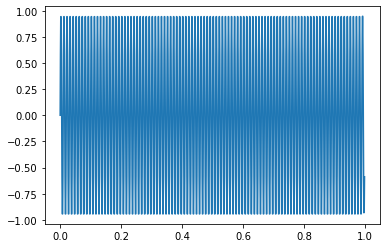